In [1]:
import os
import sys
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
sys.path.append('..')

In [2]:
from keras.applications.imagenet_utils import decode_predictions

from efficientnet import EfficientNetB0
from efficientnet import center_crop_and_resize, preprocess_input

Using TensorFlow backend.


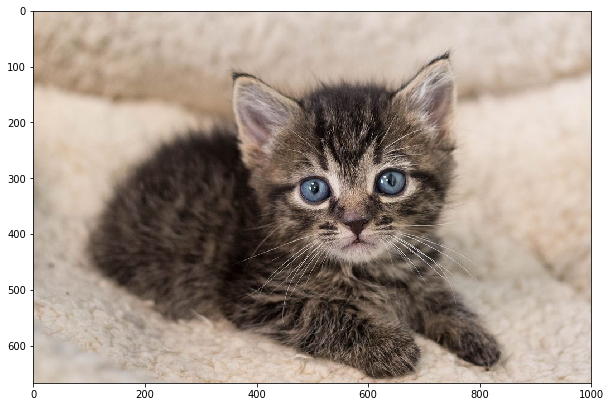

In [8]:
# test image
image = imread('./kitten.jpeg')

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [6]:
# loading pretrained model
model = EfficientNetB0(weights='imagenet')

W0706 13:16:51.243641 140516146313024 deprecation_wrapper.py:119] From /home/dmkirichen/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0706 13:16:51.521604 140516146313024 deprecation_wrapper.py:119] From /home/dmkirichen/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0706 13:16:51.553642 140516146313024 deprecation_wrapper.py:119] From /home/dmkirichen/anaconda3/lib/python3.7/site-packages/efficientnet/initializers.py:30: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0706 13:16:51.650803 140516146313024 deprecation_wrapper.py:119] From /home/dmkirichen/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_defau

21856256/21849008 [==============================] - 4s 0us/step


In [9]:
# preprocess input
image_size = model.input_shape[1]
x = center_crop_and_resize(image, image_size=image_size)
x = preprocess_input(x)
x = np.expand_dims(x, 0)

# make prediction and decode
y = model.predict(x)
decode_predictions(y)

[[('n02123045', 'tabby', 0.6284432),
  ('n02123159', 'tiger_cat', 0.07698657),
  ('n02127052', 'lynx', 0.056135844),
  ('n02123394', 'Persian_cat', 0.056133438),
  ('n02124075', 'Egyptian_cat', 0.0283945)]]